In [20]:
import csv
import numpy as np
import pandas as pd
import os
from subprocess import check_output
import matplotlib.pyplot as plt 
import scipy.stats as st
import seaborn as sns

csv_file = "City_of_Seattle_Wages_by_Department.csv"

sea_wage_df = pd.read_csv(csv_file)
sea_wage_df.head()

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,NaN,29.75,1.0,29.75,1,39.0,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.0,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.0,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.0,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.0,100.0,NaN


In [2]:
number_employees_male = sea_wage_df.groupby("Department").agg({"No. Male Empl":"sum"})
number_employees_male

,No. Male Empl
Department,
Arts and Cultural Affairs,8.0
City Auditor,2.0
City Budget Office,10.0
City Employees Retirement Syst,4.0
City Light,1169.0
Civil Service Commissions,5.0
Department of Planning & Dev,177.0
Dept of Finance & Admn Svc,272.0
Ethics And Elections,4.0


In [34]:
hourly_wage_male = sea_wage_df.groupby("Department").agg({"Male Avg Hrly Rate":"mean"})
hourly_wage_male

,Male Avg Hrly Rate
Department,
Arts and Cultural Affairs,31.623750
City Auditor,56.390000
City Budget Office,55.170000
City Employees Retirement Syst,35.080000
City Light,40.674619
Civil Service Commissions,5.530000
Department of Planning & Dev,42.604655
Dept of Finance & Admn Svc,37.185647
Ethics And Elections,47.122500


In [30]:
number_employees_female = sea_wage_df.groupby("Department").agg({"No. Female Empl":"sum"})
number_employees_female

,No. Female Empl
Department,
Arts and Cultural Affairs,20.0
City Auditor,8.0
City Budget Office,17.0
City Employees Retirement Syst,12.0
City Light,520.0
Civil Service Commissions,3.0
Department of Planning & Dev,149.0
Dept of Finance & Admn Svc,229.0
Ethics And Elections,3.0


In [33]:
hourly_wage_female = sea_wage_df.groupby("Department").agg({"Female Avg Hrly Rate":"mean"})
hourly_wage_female

,Female Avg Hrly Rate
Department,
Arts and Cultural Affairs,36.366923
City Auditor,41.475000
City Budget Office,44.316667
City Employees Retirement Syst,37.761250
City Light,38.136923
Civil Service Commissions,29.646667
Department of Planning & Dev,40.298947
Dept of Finance & Admn Svc,36.281250
Ethics And Elections,44.870000


In [3]:
city_light_data = sea_wage_df.loc[sea_wage_df["Department"] == "City Light"]
city_light_data

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate - percentage,Notes
39,City Light,Accountant,30.63,4.0,30.92,3.0,30.75,7,83.29,99.05,NaN
40,City Light,"Accountant,Prin",38.48,2.0,39.96,1.0,38.97,3,16.67,96.28,NaN
41,City Light,"Accountant,Sr",35.26,4.0,33.67,2.0,34.73,6,55.83,104.73,NaN
42,City Light,Act Exec,NaN,NaN,43.10,1.0,43.10,1,38.00,NaN,No women in title
43,City Light,Actg Tech I-BU,22.56,1.0,22.56,1.0,22.56,2,59.50,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
298,City Light,Util Hearing Ofcr,42.25,1.0,NaN,NaN,42.25,1,80.00,NaN,No men in title
299,City Light,Util Laborer,NaN,NaN,22.56,1.0,22.56,1,244.00,NaN,No women in title
300,City Light,"Warehouser,Chief",30.88,1.0,30.88,4.0,30.88,5,185.20,100.00,NaN
301,City Light,"Warehouser,Sr-BU",26.50,4.0,26.50,9.0,26.50,13,131.08,100.00,NaN


In [17]:
chart_data_PD = sea_wage_df.loc[sea_wage_df["Department"] == "Police Department"]
chart_data_PD

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate - percentage,Notes
1101,Police Department,"Accountant,Sr",35.57,2.0,NaN,NaN,35.57,2,125.00,NaN,No men in title
1102,Police Department,Actg Tech II,21.77,1.0,NaN,NaN,21.77,1,3.00,NaN,No men in title
1103,Police Department,Actg Tech II-BU,23.06,2.0,21.77,1.0,22.63,3,21.67,105.93,NaN
1104,Police Department,Actg Tech III,25.77,1.0,NaN,NaN,25.77,1,5.00,NaN,No men in title
1105,Police Department,Actg Tech III-BU,26.28,2.0,NaN,NaN,26.28,2,37.00,NaN,No men in title
...,...,...,...,...,...,...,...,...,...,...,...
1210,Police Department,Video Spec II,NaN,NaN,35.65,4.0,35.65,4,91.00,NaN,No women in title
1211,Police Department,Volunteer Supv,26.26,1.0,NaN,NaN,26.26,1,63.00,NaN,No men in title
1212,Police Department,"Warehouser,Chief",30.88,1.0,30.88,2.0,30.88,3,50.67,100.00,NaN
1213,Police Department,"Warehouser,Sr",NaN,NaN,26.50,1.0,26.50,1,176.00,NaN,No women in title


In [18]:
avg_pd = chart_data_PD.mean()
avg_pd

Female Avg Hrly Rate                                              38.421341
No. Female Empl                                                    6.463415
Male Avg Hrly Rate                                                42.908537
No. Male Empl                                                     15.951220
Total Avg Hrly Rate                                               41.588509
Total No. Empl                                                    16.122807
Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION       83.864474
Ratio of women's hourly rate to men's hourly rate - percentage    99.363600
dtype: float64

In [8]:
avg_city_lights = chart_data.mean()
avg_city_lights

Female Avg Hrly Rate                                               38.136923
No. Female Empl                                                     3.076923
Male Avg Hrly Rate                                                 40.674619
No. Male Empl                                                       5.566667
Total Avg Hrly Rate                                                39.214015
Total No. Empl                                                      6.397727
Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION        79.104659
Ratio of women's hourly rate to men's hourly rate - percentage    100.216404
dtype: float64

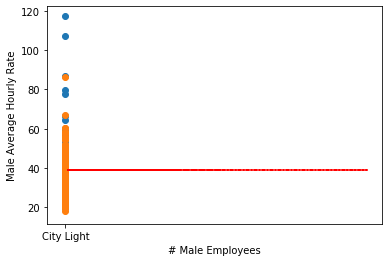

In [16]:
 y_mean = [np.mean(avg_city_lights)]*len(chart_data)

fig,ax = plt.subplots()

# Plot the data

# Plot the average line
mean_line = ax.plot(chart_data['No. Male Empl'],y_mean, label='Mean', linestyle='--', color='red')

plt.scatter(chart_data['Department'],chart_data['Male Avg Hrly Rate'])
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')


plt.show()

In [12]:
avg_city_lights = chart_data.mean()
avg_city_lights

Female Avg Hrly Rate                                               38.136923
No. Female Empl                                                     3.076923
Male Avg Hrly Rate                                                 40.674619
No. Male Empl                                                       5.566667
Total Avg Hrly Rate                                                39.214015
Total No. Empl                                                      6.397727
Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION        79.104659
Ratio of women's hourly rate to men's hourly rate - percentage    100.216404
dtype: float64

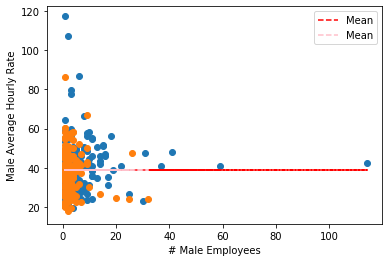

In [36]:
 y_mean = [np.mean(avg_city_lights)]*len(chart_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(chart_data['No. Male Empl'],chart_data['Male Avg Hrly Rate'])

# Plot the average line
mean_line = ax.plot(chart_data['No. Male Empl'],y_mean, label='Mean', linestyle='--', color='red')
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
legend = ax.legend(loc='upper right')

plt.scatter(chart_data['No. Female Empl'],chart_data['Female Avg Hrly Rate'])
mean_line = ax.plot(chart_data['No. Female Empl'],y_mean, label='Mean', linestyle='--', color='pink')
legend = ax.legend(loc='upper right')
plt.show()

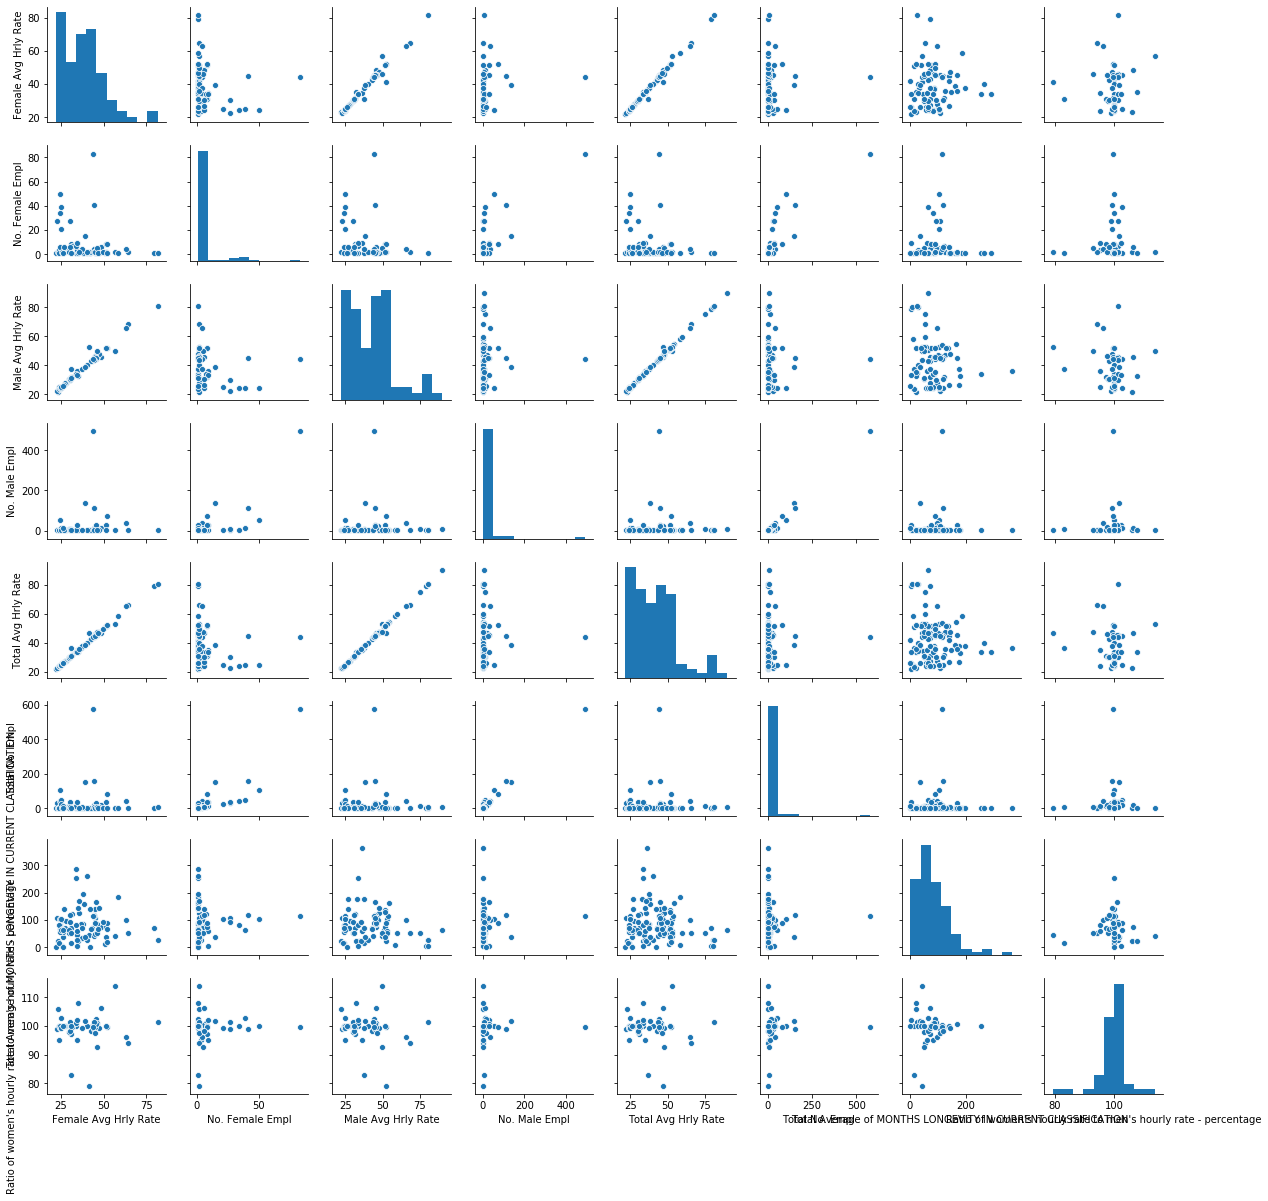

In [25]:
sns.pairplot(chart_data_PD)

In [ ]:
city_light_data = sea_wage_df.loc[sea_wage_df["Department"] == "City Light"]
